Para lo siguiente vamos a aplicar convolucionar Sobel
**** INVESTIGAR SOBEL

## Imports

In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

## 1 Exploración de datos

In [3]:
df = pd.read_hdf('2_Cleaned_dataset/images.h5', key='data')
df.shape

(910, 10)

In [5]:
df['image'][80].shape

(188, 398)

1.1 Prodicción de imagenes

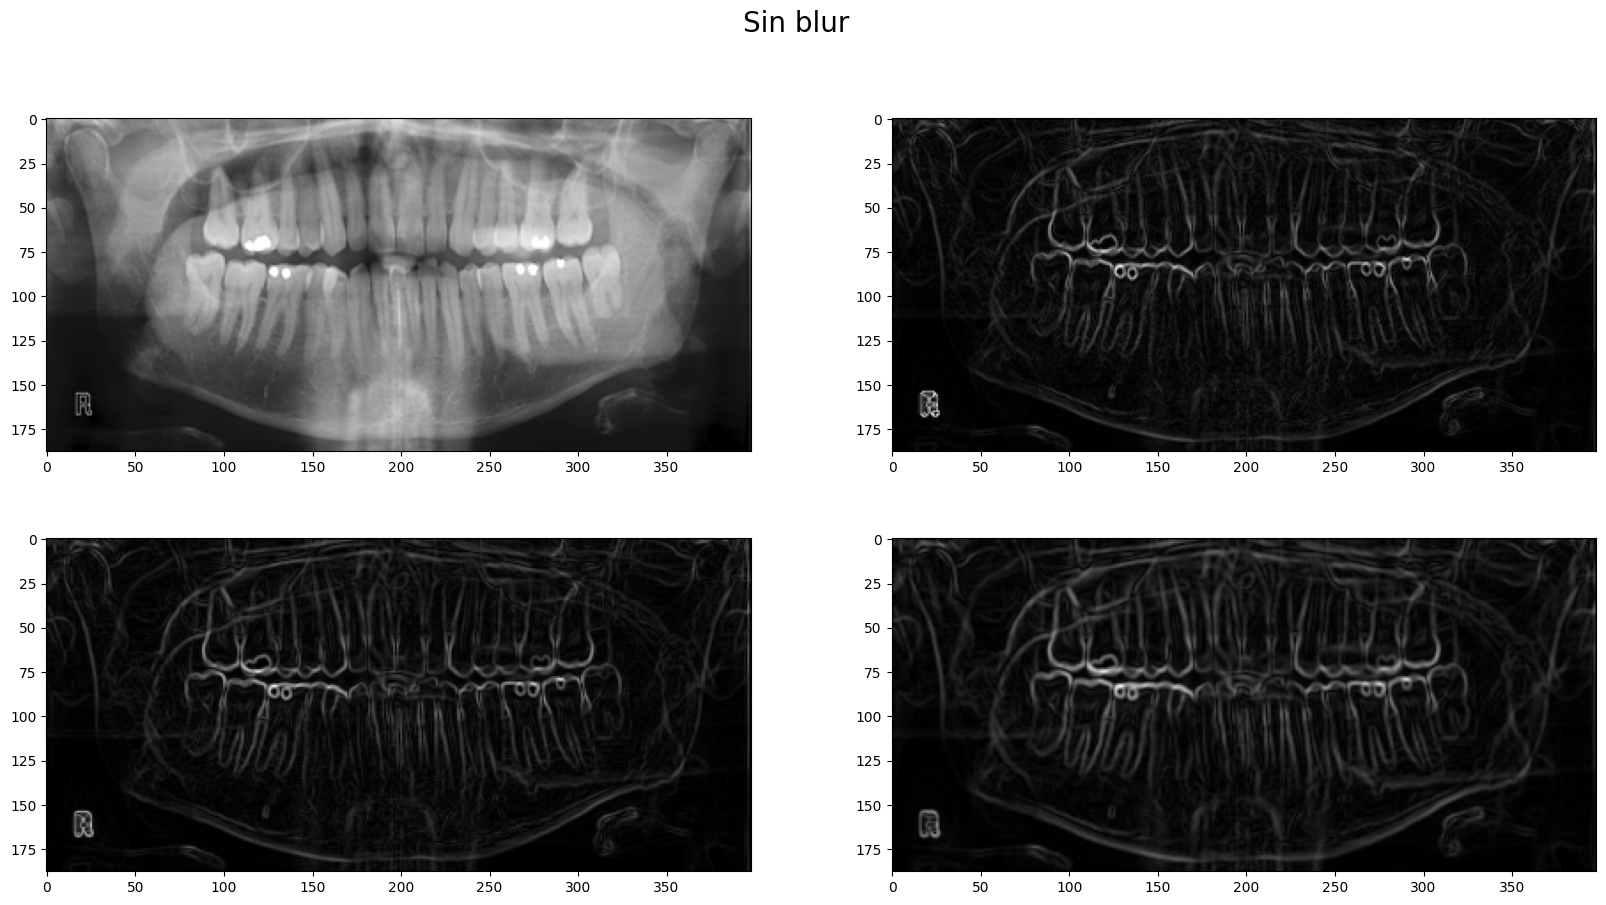

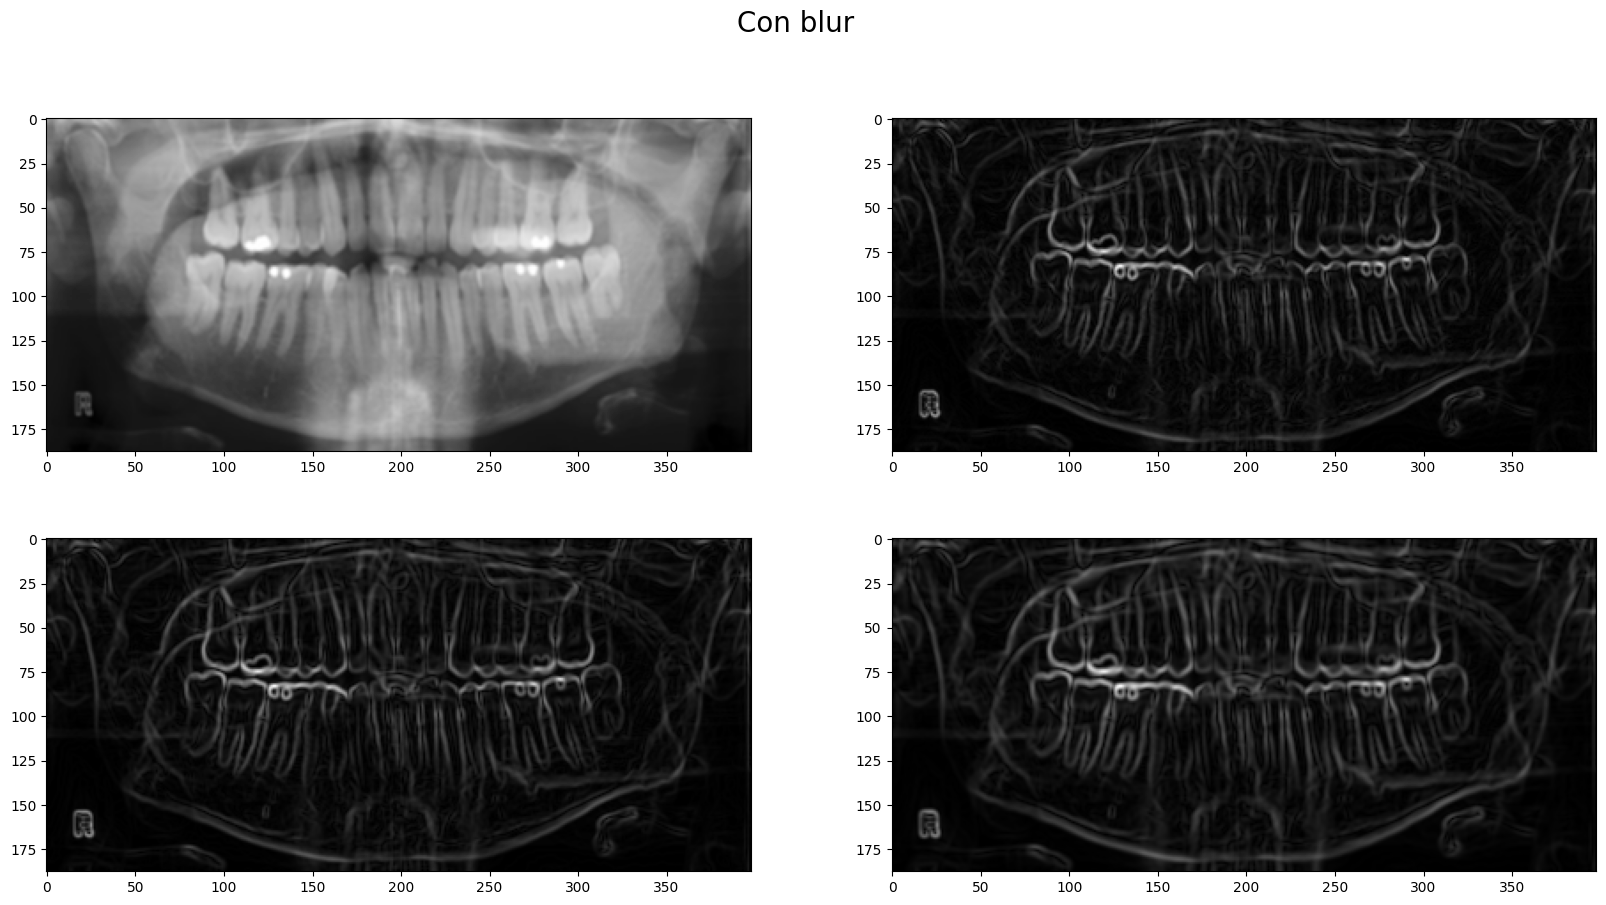

In [21]:

def apply_filter_sobel(image, ksize):
    # Aplicar Sobel en la dirección X y Y
    sobelX = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=ksize)
    sobelY = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=ksize)

    # Calcular la magnitud
    return np.sqrt(sobelX**2 + sobelY**2)

# Leer imagen
def show_images(title='', apply_blur=False):
    image = df['image'][2]

    # Reducimos el ruido con un kernel de 3x3
    if apply_blur:
        image = cv2.GaussianBlur(image, (3, 3), 0)
        
    # Mostrar la imagen
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

    fig.suptitle(title, fontsize=20)
    axes[0][0].imshow((image), cmap='gray')
    axes[0][1].imshow((apply_filter_sobel(image, ksize=1)), cmap='gray')
    axes[1][0].imshow((apply_filter_sobel(image, ksize=3)), cmap='gray')
    axes[1][1].imshow((apply_filter_sobel(image, ksize=5)), cmap='gray')
    plt.show()

show_images('Sin blur', False)
show_images('Con blur', True)

In [18]:
equ


array([[222, 211, 175, ..., 106,  82, 159],
       [211, 203, 157, ..., 100,  78, 134],
       [184, 186, 150, ...,  96,  78, 134],
       ...,
       [  7,   7,   9, ...,   0,   1,  26],
       [  7,   7,   7, ...,   0,   1,  26],
       [  7,   9,   7, ...,   0,   1,  26]], dtype=uint8)

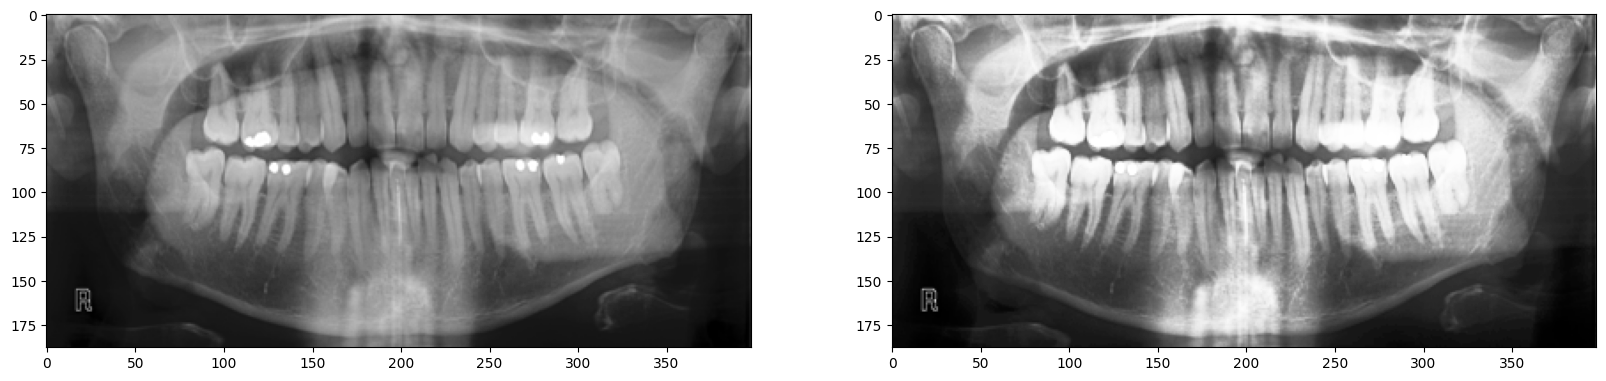

In [19]:
image = df['image'][2]
equ = cv2.equalizeHist(image)

# Mostrar la imagen
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

axes[0].imshow((image), cmap='gray')
axes[1].imshow(equ, cmap='gray')

## Entrenar un modelo

### Crear el autoencoder

In [23]:

input_shape = (188, 398, 1)

# Definir el encoder
input_img = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Definir el decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

### Entrenar el autoencoder

In [ ]:
images = df['image']
# Primero, convertimos el array anidado en una lista de arrays
list_of_images = [img for img in images[:, 0]]

# Ahora, convertimos la lista de arrays en un solo tensor/array de 4 dimensiones
final_images_array = np.array(list_of_images).reshape(910, 188, 398, 1)

In [ ]:

images = np.array(images)  # Asegúrate de que 'images' sea una lista de numpy arrays
images = images / 255.  # Normalizar entre 0 y 1
images = np.expand_dims(images, axis=-1)  # Añadir dimensión del canal

images_list = images.tolist()
autoencoder.fit(images_list, images_list, epochs=10, batch_size=128, shuffle=True)

### Extraer características y aplicar agrupación

In [ ]:
from sklearn.cluster import KMeans

NUM_CLUSTERS = 4

# Modelo de encoder para extraer características
encoder = Model(input_img, encoded)

# Extraer características
encoded_imgs = encoder.predict(images)
encoded_imgs = encoded_imgs.reshape(encoded_imgs.shape[0], -1)

# Aplicar KMeans
kmeans = KMeans(n_clusters=)  # Define el número de clusters que deseas
cluster_labels = kmeans.fit_predict(encoded_imgs)